## Question 1

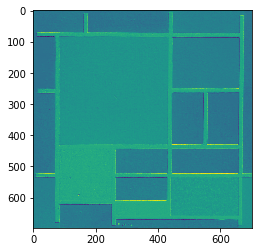

In [35]:
from skimage import color
from skimage import io
import scipy.misc as img
import numpy as np
from scipy import signal
import numpy as np
import tensorflow as tf
import pylab as plt

def customEdgeDetector(filter, imgData):
    arr_2 = color.rgb2gray(imgData)
    Imagey = arr_2.shape[1]
    Filtery = arr_1.shape[1]

    Imagex = arr_2.shape[0]
    Filterx = arr_1.shape[0]

    stride = 1

    itery = Imagey - Filtery + 1
    iterx = Imagex - Filterx + 1
    arr1 = np.ndarray((iterx,itery,3), dtype = float)


    for itr in range(3):
        arr_2 = img[:,:,itr]
        if(Imagey>=Filtery):     
            for i in range(itery):
                arr_Part = arr_2[:, i:i + Filtery]
                W = arr_1.shape[0] 
                idx = np.arange(arr_Part.shape[0]-W+1)[:,None] + np.arange(W)
                out = arr_1*arr_Part[idx]
                ll =  np.array([np.sum(arr) for arr in out], dtype = float).T
                arr1[:,i,itr] = ll
    return arr1

img = io.imread('C:\\Users\\Abhi\\Desktop\\abc.jpg')
arr_1 = np.array([[-1,1,1],[1,-1,1],[-1,-1,-1]], dtype = float)
output = customEdgeDetector(arr_1, img)
img1 = output[:,:,0] + output[:,:,1] + output[:,:,2] 

plt.imshow(img1)
plt.show()


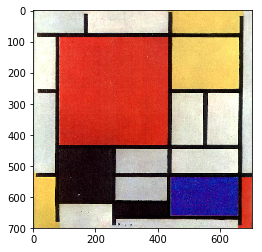

In [36]:
imgOriginal = io.imread('C:\\Users\\Abhi\\Desktop\\abc.jpg')
plt.imshow(imgOriginal)
plt.show()

# Question 2

# MNIST1

In [37]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = len(classes)

def my_cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
  pool1_flat=tf.reshape(pool1, [-1,14*14*32])

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  
  #conv2 = tf.layers.conv2d(
    #inputs=pool1,
     # filters=64,
      #kernel_size=[5, 5],
      #padding="same",
      #activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  #pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  #pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool1_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units= num_classes)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

 #  Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy for 1 layer CNN": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
indices = np.isin(train_labels,classes)
sample_train_data = train_data[indices,:]
sample_train_labels = train_labels[indices]

eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
indices_test = np.isin(eval_labels,classes)
sample_eval_data = eval_data[indices_test,:]
sample_eval_labels = eval_labels[indices_test]

  # Create the Estimator
mnist_classifier = tf.estimator.Estimator(
      model_fn=my_cnn_model_fn)#, model_dir="/tmp/mnist_convnet_model")

  # Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": sample_train_data},
      y=sample_train_labels,
      batch_size=50,
      num_epochs=None,
      shuffle=True)
mnist_classifier.train(
      input_fn=train_input_fn,
      steps=1000)

  # Evaluate the model and print results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": sample_eval_data},
      y=sample_eval_labels,
      batch_size=50,
      num_epochs=1,
      shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Abhi\\AppData\\Local\\Temp\\tmp59qeacqz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FACEB25160>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Abhi\AppData\Local\Temp\tmp59qeacqz\model.ckpt.
INFO:tensorflow:loss = 2.3033621, step = 1

# MNIST2

In [38]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)


def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy for 2 layer CNN": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


def main(unused_argv):
  # Load training and eval data
  mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  train_data = mnist.train.images  # Returns np.array
  train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  eval_data = mnist.test.images  # Returns np.array
  eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

  # Create the Estimator
  mnist_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

  # Set up logging for predictions
  # Log the values in the "Softmax" tensor with label "probabilities"
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

  # Train the model
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=50,
      num_epochs=None,
      shuffle=True)
  mnist_classifier.train(
      input_fn=train_input_fn,
      steps=1000,
      hooks=[logging_hook])

  # Evaluate the model and print results
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)
  eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)


if __name__ == "__main__":
  tf.app.run()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/mnist_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FAD1945278>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-2002
INFO:tensorflow:Saving checkpoints for 2003 into /tmp/mnist_convnet_model\model.ckpt.
IN

INFO:tensorflow:global_step/sec: 3.32013
INFO:tensorflow:probabilities = [[0.00012215 0.09381843 0.04614171 0.00173542 0.00774353 0.00204157
  0.8241655  0.00050386 0.01707432 0.0066535 ]
 [0.95882344 0.00001514 0.00252636 0.01065153 0.0006714  0.01496649
  0.00096445 0.00169548 0.00866497 0.00102073]
 [0.03084418 0.00059466 0.8144522  0.06525172 0.0006174  0.00623401
  0.03283006 0.0035752  0.04457957 0.00102111]
 [0.0273587  0.01269051 0.05695501 0.61474    0.00024336 0.09794908
  0.00625062 0.00056644 0.17795107 0.00529509]
 [0.00997013 0.10987029 0.04093684 0.64495623 0.00029361 0.08567279
  0.00330064 0.00159868 0.10050516 0.00289554]
 [0.01410001 0.3871009  0.03797975 0.0918331  0.01264018 0.18174602
  0.11153281 0.03098009 0.10423374 0.02785343]
 [0.00425695 0.00395026 0.46598014 0.02814159 0.12016782 0.00834555
  0.16312277 0.02967773 0.01284932 0.16350788]
 [0.14035684 0.00001767 0.01834343 0.08079636 0.0007328  0.22690131
  0.04392625 0.00011088 0.48812717 0.00068737]
 [0.037

INFO:tensorflow:global_step/sec: 3.46622
INFO:tensorflow:probabilities = [[0.01166106 0.00558793 0.01204431 0.8153206  0.00045624 0.04499652
  0.01351645 0.00184355 0.08311821 0.01145511]
 [0.9898957  0.00000006 0.00008448 0.00011299 0.00002157 0.0077709
  0.00038126 0.00005949 0.00159299 0.00008077]
 [0.14619732 0.0002076  0.04221298 0.39385235 0.00458531 0.28851378
  0.01981631 0.03867707 0.04411114 0.02182609]
 [0.00114788 0.8876741  0.0087393  0.00782438 0.00762162 0.00866713
  0.02797392 0.00417384 0.03509399 0.01108392]
 [0.50277835 0.00008195 0.07875629 0.05522598 0.00570041 0.05501582
  0.12159899 0.02443679 0.11599176 0.04041367]
 [0.00250341 0.12894751 0.0367552  0.03531457 0.00349782 0.00730114
  0.73287946 0.00015784 0.05101008 0.00163299]
 [0.00104931 0.8184484  0.00911793 0.02525805 0.01004806 0.00925872
  0.03541797 0.01054277 0.05600969 0.02484905]
 [0.0011376  0.00006883 0.00268298 0.9013147  0.00045631 0.00654049
  0.00004133 0.06728019 0.01663526 0.00384223]
 [0.0282

INFO:tensorflow:global_step/sec: 3.36945
INFO:tensorflow:probabilities = [[0.00403797 0.00012248 0.30694962 0.44597596 0.0001228  0.00844748
  0.00080954 0.13791254 0.09430025 0.0013214 ]
 [0.00322808 0.00004614 0.02656716 0.0122301  0.00308248 0.01040458
  0.0197629  0.00283865 0.917583   0.00425689]
 [0.00698566 0.00050014 0.00277277 0.9080442  0.00008558 0.05230737
  0.00033038 0.0123524  0.00898435 0.00763702]
 [0.01211928 0.10584535 0.02584458 0.22787024 0.02961165 0.17946877
  0.05670454 0.02761544 0.26979625 0.06512385]
 [0.00489392 0.00003796 0.01665826 0.05112259 0.00643671 0.06646052
  0.00631834 0.00320881 0.8223035  0.02255944]
 [0.00543584 0.00366954 0.03462311 0.00632179 0.5104324  0.03492687
  0.18536244 0.0079651  0.07579555 0.13546735]
 [0.00274858 0.07607528 0.00815614 0.02920687 0.11947143 0.03076122
  0.01187004 0.1465316  0.09563553 0.47954336]
 [0.03094458 0.00247406 0.03284968 0.02253525 0.01321137 0.43391827
  0.32224026 0.00036219 0.13169818 0.00976619]
 [0.002

INFO:tensorflow:global_step/sec: 3.38332
INFO:tensorflow:probabilities = [[0.00043986 0.00006596 0.9957638  0.00066677 0.0000133  0.00003486
  0.00216398 0.00004465 0.00078688 0.00001991]
 [0.00724413 0.00300459 0.02484718 0.01562658 0.65618664 0.01047794
  0.02963344 0.01926937 0.02638764 0.20732251]
 [0.01679757 0.00019486 0.03696663 0.00012623 0.02146706 0.00637011
  0.8934755  0.00010125 0.02423114 0.00026963]
 [0.00235205 0.760511   0.0122321  0.03318184 0.00836202 0.01375213
  0.03949926 0.04593321 0.05398443 0.03019194]
 [0.00033952 0.00072748 0.02544508 0.7522427  0.00046797 0.03823513
  0.00036118 0.01136577 0.16722292 0.00359224]
 [0.00064402 0.00000769 0.01772902 0.00002899 0.00013182 0.00059984
  0.9803034  0.00000234 0.00031799 0.0002349 ]
 [0.00015179 0.00867156 0.02072699 0.00129124 0.0053467  0.00113521
  0.9462493  0.00001859 0.01578199 0.00062663]
 [0.00529949 0.04937897 0.01949654 0.05243185 0.00410202 0.03719151
  0.00832143 0.02071018 0.75206685 0.05100109]
 [0.000

INFO:tensorflow:global_step/sec: 3.31211
INFO:tensorflow:probabilities = [[0.00134604 0.05168777 0.04547687 0.01913924 0.13686231 0.02273495
  0.57897747 0.00340724 0.02680252 0.11356555]
 [0.006199   0.11651823 0.09159278 0.01395884 0.04217542 0.01525116
  0.6038337  0.00196511 0.0952595  0.0132463 ]
 [0.01471813 0.00010494 0.0025191  0.01455012 0.00746467 0.12407531
  0.12174878 0.00228587 0.70223933 0.0102937 ]
 [0.06589613 0.00016192 0.00423854 0.11563788 0.00895138 0.5342272
  0.01469082 0.00492308 0.14223272 0.10904039]
 [0.04204286 0.00656853 0.00991689 0.78104913 0.00081157 0.10401184
  0.00239429 0.02091557 0.02641315 0.00587623]
 [0.00012697 0.30458722 0.22103271 0.00811161 0.00781481 0.00055035
  0.42496637 0.00035001 0.02615153 0.00630846]
 [0.00777999 0.0039293  0.00063986 0.01287817 0.01499946 0.0251247
  0.00071184 0.81849104 0.04159891 0.07384678]
 [0.00028648 0.9745283  0.00700341 0.00445364 0.00067276 0.00078979
  0.00311366 0.00356996 0.00373999 0.00184212]
 [0.00056

INFO:tensorflow:global_step/sec: 3.28232
INFO:tensorflow:probabilities = [[0.00879926 0.01027167 0.03780794 0.15876675 0.00801586 0.0420469
  0.16706206 0.00119928 0.5337722  0.03225805]
 [0.00018377 0.94407856 0.00354863 0.01356413 0.00356896 0.00368449
  0.0045131  0.00666171 0.0112935  0.00890325]
 [0.00060474 0.00000326 0.02524173 0.9576735  0.00004276 0.00274444
  0.00003029 0.00372589 0.00942404 0.00050923]
 [0.00016251 0.00319374 0.00046836 0.00196981 0.10386567 0.0036354
  0.00310781 0.0637679  0.020041   0.7997878 ]
 [0.99806684 0.         0.00012424 0.00005799 0.000001   0.00139038
  0.0003387  0.00000174 0.0000166  0.00000253]
 [0.90691656 0.00015502 0.00500628 0.02967158 0.0001244  0.03473676
  0.00244752 0.0032562  0.0169281  0.00075744]
 [0.0018151  0.00603214 0.918058   0.00453713 0.00012781 0.00179104
  0.03084394 0.00006622 0.03662761 0.00010098]
 [0.00038408 0.00064125 0.0005601  0.7439074  0.00025727 0.00708132
  0.00013167 0.1429898  0.06354752 0.04049954]
 [0.00722

INFO:tensorflow:global_step/sec: 3.33955
INFO:tensorflow:probabilities = [[0.00091249 0.0144926  0.00274572 0.0006088  0.8795481  0.00545163
  0.04655566 0.00106023 0.00479889 0.04382599]
 [0.9388932  0.0000218  0.00199422 0.00090979 0.00061846 0.05074096
  0.00251759 0.00064755 0.00246932 0.001187  ]
 [0.0136585  0.26184443 0.30081302 0.07991511 0.04540043 0.01936107
  0.00246193 0.01734488 0.24485657 0.014344  ]
 [0.00059555 0.00014311 0.00040746 0.0010983  0.8174377  0.01684335
  0.01698995 0.00429697 0.00561413 0.13657345]
 [0.9828619  0.00000082 0.00163515 0.00004283 0.00003706 0.01468932
  0.00016895 0.00002446 0.00041319 0.0001263 ]
 [0.014422   0.06583973 0.06463988 0.06098212 0.00230745 0.01551683
  0.00087147 0.6363834  0.08293283 0.05610436]
 [0.21398339 0.00010128 0.00358002 0.00426826 0.00140835 0.19063988
  0.55968934 0.00002941 0.02392597 0.00237407]
 [0.00404268 0.08537185 0.02828838 0.0025381  0.00801846 0.0200937
  0.7934092  0.0008615  0.05305455 0.00432156]
 [0.0006

INFO:tensorflow:global_step/sec: 3.4589
INFO:tensorflow:probabilities = [[0.0000745  0.00001056 0.00313327 0.00005679 0.00074964 0.00014202
  0.9945857  0.00001271 0.00095348 0.00028139]
 [0.00031639 0.0000247  0.00009024 0.00418268 0.79785717 0.00674003
  0.00028318 0.01966481 0.00132534 0.16951554]
 [0.00483332 0.00037635 0.00005734 0.00475621 0.04488215 0.0279165
  0.0002895  0.3431973  0.00869286 0.56499845]
 [0.00364877 0.8934726  0.03619143 0.01501365 0.00773738 0.00446082
  0.00096642 0.00962527 0.02317703 0.00570671]
 [0.00104662 0.00001725 0.02730288 0.9602535  0.00000237 0.00884469
  0.00009893 0.00045477 0.00193184 0.00004715]
 [0.01361985 0.0001808  0.00323204 0.9059737  0.0002897  0.04483161
  0.00144721 0.00606064 0.02350701 0.00085739]
 [0.00150438 0.00156534 0.7838412  0.10209683 0.00146866 0.00531349
  0.03280381 0.01770123 0.05110314 0.00260184]
 [0.00882062 0.00000509 0.9796102  0.00229514 0.000018   0.00095328
  0.00591005 0.00026574 0.00210894 0.00001291]
 [0.00114

INFO:tensorflow:global_step/sec: 3.59198
INFO:tensorflow:probabilities = [[0.00290587 0.00001422 0.00212917 0.03289956 0.05321081 0.48835737
  0.00197387 0.0037325  0.06068248 0.35409427]
 [0.00027988 0.27966058 0.0036195  0.01527574 0.00014432 0.0006934
  0.00002538 0.5660217  0.10452904 0.02975058]
 [0.07530069 0.00689159 0.0029247  0.04175048 0.00034906 0.82758814
  0.00418537 0.00265336 0.0361842  0.00217235]
 [0.00057293 0.02146465 0.03114935 0.01220264 0.02425894 0.04109712
  0.69510597 0.00034517 0.16688907 0.00691422]
 [0.0027568  0.00171785 0.00316324 0.6867404  0.00025741 0.22953993
  0.00532882 0.00642543 0.05866975 0.00540047]
 [0.00102338 0.00147154 0.00543823 0.001419   0.61842513 0.00707562
  0.10491565 0.00546855 0.03057972 0.2241831 ]
 [0.01999085 0.1976837  0.14160271 0.5769034  0.00057178 0.01998966
  0.00800507 0.01431132 0.01485022 0.00609125]
 [0.00062833 0.00035933 0.9816096  0.00440112 0.00009524 0.0002819
  0.00214091 0.00229194 0.00805248 0.00013916]
 [0.00012

INFO:tensorflow:Saving checkpoints for 3002 into /tmp/mnist_convnet_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.29176286.
INFO:tensorflow:Starting evaluation at 2018-03-22-06:40:17
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-3002
INFO:tensorflow:Finished evaluation at 2018-03-22-06:40:35
INFO:tensorflow:Saving dict for global step 3002: accuracy for 2 layer CNN = 0.9005, global_step = 3002, loss = 0.38117218
{'accuracy for 2 layer CNN': 0.9005, 'loss': 0.38117218, 'global_step': 3002}


SystemExit: 

C:\Users\Abhi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# MNIST3 

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)


def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]

  conv3 = tf.layers.conv2d(
      inputs=pool2,
      filters=128,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
  print(pool3.get_shape())  
    
  pool3_flat = tf.reshape(pool3, [-1, 3 * 3 * 128])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool3_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


def main(unused_argv):
  # Load training and eval data
  mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  train_data = mnist.train.images  # Returns np.array
  train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  eval_data = mnist.test.images  # Returns np.array
  eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

  # Create the Estimator
  mnist_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

  # Set up logging for predictions
  # Log the values in the "Softmax" tensor with label "probabilities"
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

  # Train the model
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=100,
      num_epochs=None,
      shuffle=True)
  mnist_classifier.train(
      input_fn=train_input_fn,
      steps=20000,
      hooks=[logging_hook])

  # Evaluate the model and print results
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)
  eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)


if __name__ == "__main__":
  tf.app.run()

### Question 2.3

From the above results containing 1, 2 and 3 convolution layers, we can say that by adding more layers the accuracy of model increases. 
This is because the model becomes more complex and its accuracy on training data increases with the number of layers added. But this results
to overfitting of data which there by decreases the accuracy on test data

### Question 2.4

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])
y_main = tf.placeholder(tf.float32, [None, 10])

#https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def shuffle_rows(arr,rows):
    np.random.shuffle(arr[rows[0]:rows[1]])

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

Weight_conv1 = weight_variable([5, 5, 1, 32])
bias_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, Weight_conv1) + bias_conv1)
h_pool1 = max_pool_2x2(h_conv1)

Weight_conv2 = weight_variable([5, 5, 32, 64])
bias_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, Weight_conv2) + bias_conv2)
h_pool2 = max_pool_2x2(h_conv2)

Weight_fc1 = weight_variable([7 * 7 * 64, 1024])
bias_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, Weight_fc1) + bias_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Weight_fc2 = weight_variable([1024, 10])
bias_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, Weight_fc2) + bias_fc2

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_main, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_main, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#http://www.datascienceassn.org/content/tensorflow-tutorial-adversarial-noise-mnist
arrTrain10 = np.ndarray((22,1), dtype = float)
arrTrain25 = np.ndarray((22,1), dtype = float)
arrTrain50 = np.ndarray((22,1), dtype = float)
arrTrain75 = np.ndarray((22,1), dtype = float)
arrTrain100 = np.ndarray((22,1), dtype = float)

arrTest10 = np.ndarray((22,1), dtype = float)
arrTest25 = np.ndarray((22,1), dtype = float)
arrTest50 = np.ndarray((22,1), dtype = float)
arrTest75 = np.ndarray((22,1), dtype = float)
arrTest100 = np.ndarray((22,1), dtype = float)

count = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #10% Noise
    for i in range(1000):
        batch = mnist.train.next_batch(50)
        shuffle_rows(batch[1], [0,5])
        if i % 100 == 0:
            train_accuracy10 = accuracy.eval(feed_dict={
                x: batch[0], y_main: batch[1], keep_prob: 1.0})
            arrTrain10[count] = train_accuracy10
            count+=1
            print('Step %d, Train accuracy %g' % (i, train_accuracy10))
        train_step.run(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 0.5})
    count = 0 
    # 10% Noise
    for i in range(1000):
        batch = mnist.test.next_batch(50)
        if i % 100 == 0:
            test_accuracy = accuracy.eval(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 1.0})
            print('Test accuracy %g' % test_accuracy)
            arrTest10[count] = test_accuracy
            count+=1
    sess.close()        
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    count = 0
    #25% Noise
    for i in range(1000):
        batch = mnist.train.next_batch(50)
        shuffle_rows(batch[1], [0,12])
        if i % 100 == 0:
            train_accuracy25 = accuracy.eval(feed_dict={
                x: batch[0], y_main: batch[1], keep_prob: 1.0})
            arrTrain25[count] = train_accuracy25
            count+=1
            print('Step %d, Training accuracy %g' % (i, train_accuracy25))
        train_step.run(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 0.5})
        
    count = 0        
    # 25% Noise
    for i in range(1000):
        batch = mnist.test.next_batch(50)
        #shuffle_rows(batch[1], [0,37])
        if i % 100 == 0:
            test_accuracy = accuracy.eval(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 1.0})
            print('Test accuracy %g' % test_accuracy)
            arrTest25[count] = test_accuracy
            count+=1   
    sess.close()
    
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    count = 0 
    #50% Noise
    for i in range(1000):
        batch = mnist.train.next_batch(50)
        shuffle_rows(batch[1], [0,25])
        if i % 100 == 0:
            train_accuracy50 = accuracy.eval(feed_dict={
                x: batch[0], y_main: batch[1], keep_prob: 1.0})
            arrTrain50[count] = train_accuracy50
            count+=1
            print('Step %d, Training accuracy %g' % (i, train_accuracy50))
        train_step.run(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 0.5})
        
    count = 0        
    # 50% Noise
    for i in range(1000):
        batch = mnist.test.next_batch(50)
        #shuffle_rows(batch[1], [0,37])
        if i % 100 == 0:
            test_accuracy = accuracy.eval(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 1.0})
            print('Test accuracy %g' % test_accuracy)
            arrTest50[count] = test_accuracy
            count+=1 
    sess.close()        
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    count = 0 
    #75% Noise
    for i in range(1000):
        batch = mnist.train.next_batch(50)
        shuffle_rows(batch[1], [0,37])
        if i % 100 == 0:
            train_accuracy75 = accuracy.eval(feed_dict={
                x: batch[0], y_main: batch[1], keep_prob: 1.0})
            arrTrain75[count] = train_accuracy75
            count+=1
            print('Step %d, Training accuracy %g' % (i, train_accuracy75))
        train_step.run(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 0.5})  
        
    count = 0        
    # 75% Noise
    for i in range(1000):
        batch = mnist.test.next_batch(50)
        #shuffle_rows(batch[1], [0,37])
        if i % 100 == 0:
            test_accuracy = accuracy.eval(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 1.0})
            print('Test accuracy %g' % test_accuracy)
            arrTest75[count] = test_accuracy
            count+=1 
    sess.close()        

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
    count = 0 
    #100% Noise
    for i in range(1000):
        batch = mnist.train.next_batch(50)
        shuffle_rows(batch[1], [0,50])
        if i % 100 == 0:
            train_accuracy100 = accuracy.eval(feed_dict={
                x: batch[0], y_main: batch[1], keep_prob: 1.0})
            arrTrain100[count] = train_accuracy100
            count+=1
            print('Step %d, Training accuracy %g' % (i, train_accuracy100))
        train_step.run(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 0.5})       
            
    count = 0        
    # 100% Noise
    for i in range(1000):
        batch = mnist.test.next_batch(50)
        #shuffle_rows(batch[1], [0,50])
        if i % 100 == 0:
            test_accuracy = accuracy.eval(feed_dict={x: batch[0], y_main: batch[1], keep_prob: 1.0})
            print('Test accuracy %g' % test_accuracy)
            arrTest100[count] = test_accuracy
            count+=1 
    sess.close()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Step 0, Train accuracy 0.08
Step 100, Train accuracy 0.82
Step 200, Train accuracy 0.84
Step 300, Train accuracy 0.86
Step 400, Train accuracy 0.84
Step 500, Train accuracy 0.9
Step 600, Train accuracy 0.84
Step 700, Train accuracy 0.9
Step 800, Train accuracy 0.88
Step 900, Train accuracy 0.9
Test accuracy 0.94
Test accuracy 0.92
Test accuracy 0.98
Test accuracy 0.94
Test accuracy 0.96
Test accuracy 0.96
Test accuracy 0.98
Test accuracy 0.94
Test accuracy 0.94
Test accuracy 0.88
Step 0, Training accuracy 0.12
Step 100, Training accuracy 0.6
Step 200, Training accuracy 0.64
Step 300, Training accuracy 0.7
Step 400, Training accuracy 0.68
Step 500, Training accuracy 0.66
Step 600, Training accuracy 0.64
Step 700, Training accuracy 0.72
Step 800, Training accuracy 0.72
Step 900, Training accuracy 

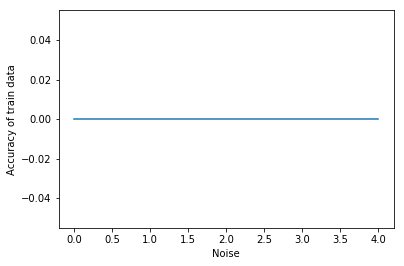

In [42]:
import matplotlib.pyplot as plt

train = (arrTrain10.T[0][21], arrTrain25.T[0][21], arrTrain50.T[0][21], arrTrain75.T[0][21], arrTrain100.T[0][21])

plt.xlabel('Noise')
plt.ylabel('Accuracy of train data')
plt.plot(train)
plt.show()

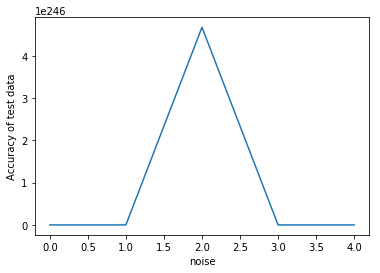

In [43]:
test = (np.mean(arrTest10.T[0]), np.mean(arrTest25.T[0]), np.mean(arrTest50.T[0]), np.mean(arrTest75.T[0]), np.mean(arrTest100.T[0]))

plt.xlabel('noise')
plt.ylabel('Accuracy of test data')
plt.plot(test)
plt.show()

As observed from the results we can see that by increasing the noise, the performance of the model decreases more and more. At 100%
noise, the model's predictibility is too degraded.